In [3]:
from actincme.bin.symmetricize import Symmetricize
from actincme.bin.rotate import Rotate
from actincme.bin.filament import Filament
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:

filaments = Filament('../Notebooks/', 'BranchedActinCoordinates_Integers')
filaments.calculate_directionality() #handles all the logic 


/Users/ritvikvasan/Documents/GitHub/actincme/actincme/bin/filament.py:24: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  coords_df = pd.read_table(f, delim_whitespace=True)
/Users/ritvikvasan/Documents/GitHub/actincme/actincme/bin/filament.py:66: RuntimeWarning: invalid value encountered in double_scalars
  ydir = np.degrees(np.arcsin(deltayy/fil_length))
/Users/ritvikvasan/Documents/GitHub/actincme/actincme/bin/filament.py:67: RuntimeWarning: invalid value encountered in double_scalars
  zdir = np.degrees(-(np.arcsin(deltazz/fil_length)))
/Users/ritvikvasan/Documents/GitHub/actincme/actincme/bin/filament.py:67: RuntimeWarning: invalid value encountered in arcsin
  zdir = np.degrees(-(np.arcsin(deltazz/fil_length)))
/Users/ritvikvasan/Documents/GitHub/actincme/actincme/bin/filament.py:66: RuntimeWarning: invalid value encountered in arcsin
  ydir = np.degrees(np.arcsin(deltayy/fil_length))
/Users/ritvikvasan/Documents/GitHub/actincme/actincme/bin/fil

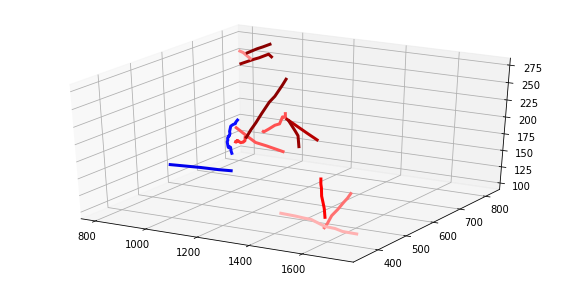

In [4]:
fig = plt.figure(figsize=[10,5])
ax=fig.add_subplot(111, projection='3d')
filaments.plot_filaments(ax)